In [1]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.id.300.vec.gz

--2019-07-09 07:12:22--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.id.300.vec.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.20.6.166, 104.20.22.166, 2606:4700:10::6814:16a6, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.20.6.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1227018698 (1.1G) [binary/octet-stream]
Saving to: ‘cc.id.300.vec.gz’

cc.id.300.vec.gz    100%[===================>]   1.14G  11.8MB/s    in 99s     

2019-07-09 07:14:02 (11.8 MB/s) - ‘cc.id.300.vec.gz’ saved [1227018698/1227018698]



In [0]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.id.vec

--2019-07-08 10:27:30--  https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.id.vec
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.20.22.166, 104.20.6.166, 2606:4700:10::6814:16a6, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.20.22.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 791484502 (755M) [binary/octet-stream]
Saving to: ‘wiki.id.vec’

wiki.id.vec         100%[===================>] 754.82M  31.4MB/s    in 25s     

2019-07-08 10:27:55 (30.7 MB/s) - ‘wiki.id.vec’ saved [791484502/791484502]



In [3]:
#!python -m spacy init-model id id_vectors_wiki_lg --vectors-loc wiki.id.vec
!python -m spacy init-model id id_vectors_wiki_lg --vectors-loc cc.id.300.vec

✔ Counted frequencies
✔ Read clusters
0it [00:00, ?it/s]
✔ Successfully created model
⠙ Reading vectors from cc.id.300.vectcmalloc: large alloc 2400002048 bytes == 0x529a000 @  0x7fa30df62001 0x7fa30bae9de5 0x7fa30bb4e6f1 0x7fa30bb507cf 0x7fa30bbe9158 0x4f8925 0x4fa6c0 0x4f7a28 0x4f876d 0x4f98c7 0x4f7a28 0x4f876d 0x4f98c7 0x4f6128 0x56fe24 0x57c2fe 0x4facb1 0x4f6128 0x4f7d60 0x4f876d 0x4f98c7 0x4f6128 0x4f7d60 0x4f876d 0x4f98c7 0x4f6128 0x517a9a 0x4f858d 0x4f98c7 0x4f6128 0x4f7d60
2000000it [02:34, 12981.70it/s]
✔ Loaded vectors from cc.id.300.vec
✔ Sucessfully compiled vocab
2010739 entries, 2000000 vectors


In [0]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-aligned/wiki.id.align.vec

--2019-07-03 06:44:18--  https://dl.fbaipublicfiles.com/fasttext/vectors-aligned/wiki.id.align.vec
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.20.6.166, 104.20.22.166, 2606:4700:10::6814:6a6, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.20.6.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 679060758 (648M) [binary/octet-stream]
Saving to: ‘wiki.id.align.vec’

wiki.id.align.vec   100%[===================>] 647.60M  28.3MB/s    in 23s     

2019-07-03 06:44:43 (27.7 MB/s) - ‘wiki.id.align.vec’ saved [679060758/679060758]



In [0]:
import gensim
#load word2vec model, here GoogleNews is used
% time model2 = gensim.models.KeyedVectors.load_word2vec_format('wiki.id.align.vec', binary=False)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


CPU times: user 1min 11s, sys: 1.14 s, total: 1min 13s
Wall time: 1min 12s


In [0]:
model2.most_similar("")

In [0]:
!gunzip cc.id.300.vec.gz

In [0]:
import gensim
% time model = gensim.models.KeyedVectors.load_word2vec_format('cc.id.300.vec', binary=False)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


CPU times: user 6min 40s, sys: 5.66 s, total: 6min 46s
Wall time: 6min 46s


In [0]:
s1 = 'sepertinya kurang efektif meredakan'
s2 = 'saya makan stroberi'

distance = model.wmdistance(s1, s2)

print ('distance = %.3f' % distance)

distance = 1.094


In [0]:
model.similarity("flu", "flus")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.30041987

In [0]:
from nltk import ngrams
Sentences="Saya anak yang baik. Rahul Ghandhi akan menjadi Perdana Menteri berikutnya. APJ Abdul Kalam adalah seorang ilmuwan India"
bigram=list(ngrams(Sentences.lower().split(),2))
trigram=list(ngrams(Sentences.lower().split(),3))
fourgram=list(ngrams(Sentences.lower().split(),4))

In [0]:
fourgram[0:10]

[('saya', 'anak', 'yang', 'baik.'),
 ('anak', 'yang', 'baik.', 'rahul'),
 ('yang', 'baik.', 'rahul', 'ghandhi'),
 ('baik.', 'rahul', 'ghandhi', 'akan'),
 ('rahul', 'ghandhi', 'akan', 'menjadi'),
 ('ghandhi', 'akan', 'menjadi', 'perdana'),
 ('akan', 'menjadi', 'perdana', 'menteri'),
 ('menjadi', 'perdana', 'menteri', 'berikutnya.'),
 ('perdana', 'menteri', 'berikutnya.', 'apj'),
 ('menteri', 'berikutnya.', 'apj', 'abdul')]

In [0]:
index2word=model.wv.index2word

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


In [0]:
len(index2word)

2000000

In [0]:
[ word for word in index2word for x in trigram if word.lower()==x[0]+”_”+x[1]+”_”+x[2] ]

SyntaxError: ignored

In [0]:
[ word for word in index2word for x in trigram if word.lower()==x[0]+”_”+x[1]+”_”+x[2] ]

SyntaxError: ignored

In [0]:
model.most_similar("kurang")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('lebih', 0.7736262083053589),
 ('cukup', 0.7303094267845154),
 ('kurangan', 0.7003087997436523),
 ('Kurang', 0.6992529034614563),
 ('kkurang', 0.6942362189292908),
 ('kuranga', 0.6932549476623535),
 ('kuranng', 0.6916425228118896),
 ('kuran', 0.691455602645874),
 ('terlalu', 0.6851677894592285),
 ('kurag', 0.6844375729560852)]

In [0]:
index2word=model.wv.index2word

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


In [0]:
s1 = 'sepertinya kurang efektif meredakan gejalan flu'
s2 = 'takut kurang ampuh mengatasi sakit flu'

s1_eng = ''

#calculate distance between two sentences using WMD algorithm
distance = model2.wmdistance(s1, s2)

print ('distance = %.3f' % distance)

In [0]:
import spacy 
nlp = spacy.load("id_vectors_wiki_lg")

In [0]:
doc1 = nlp(u"saya makan apel")
doc2 = nlp(u"Saya mengendarai mobil")
doc1.similarity(doc2)

0.31479683639521466

In [0]:
import pandas as pd
df = pd.read_csv("Arthur_detected.csv")

In [0]:
Review = df['reviewText'].tolist()

In [0]:
for eachReview in Review:
  if nlp(eachReview).similarity(nlp("meredakan gejalan")) > 0.80 and nlp(eachReview).similarity(nlp("meredakan gejalan")) < 0.90:
    print (eachReview)

/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__mai

sepertinya seperti    xxxx True True
kurang kurang    xxxx True True
efektif efektif    xxxx True False
meredakan reda    xxxx True False
gejalan gejalan    xxxx True False
flu flu    xxx True False


In [0]:
!wget https://github.com/jeannefukumaru/id_dep_ud_sm/tree/master/id_dep_ud_sm/id_dep_ud_sm-0.0.1/dist/id_dep_ud_sm-0.0.1.tar.gz

--2019-07-03 10:10:57--  https://github.com/jeannefukumaru/id_dep_ud_sm/tree/master/id_dep_ud_sm/id_dep_ud_sm-0.0.1/dist/id_dep_ud_sm-0.0.1.tar.gz
Resolving github.com (github.com)... 140.82.118.4
Connecting to github.com (github.com)|140.82.118.4|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/jeannefukumaru/id_dep_ud_sm/blob/master/id_dep_ud_sm/id_dep_ud_sm-0.0.1/dist/id_dep_ud_sm-0.0.1.tar.gz [following]
--2019-07-03 10:10:57--  https://github.com/jeannefukumaru/id_dep_ud_sm/blob/master/id_dep_ud_sm/id_dep_ud_sm-0.0.1/dist/id_dep_ud_sm-0.0.1.tar.gz
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘id_dep_ud_sm-0.0.1.tar.gz’

id_dep_ud_sm-0.0.1.     [ <=>                ]  63.02K  --.-KB/s    in 0.09s   

2019-07-03 10:10:58 (679 KB/s) - ‘id_dep_ud_sm-0.0.1.tar.gz’ saved [64531]



In [0]:
!git clone https://github.com/UniversalDependencies/UD_Indonesian-GSD.git

Cloning into 'UD_Indonesian-GSD'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 182 (delta 1), reused 4 (delta 1), pack-reused 177
Receiving objects: 100% (182/182), 8.69 MiB | 10.56 MiB/s, done.
Resolving deltas: 100% (117/117), done.


In [0]:
!python -m spacy convert content/UD_Indonesian-GSD/id_gsd-ud-train.conllu data -c conllu -n 4477


✘ Input file not found
content/UD_Indonesian-GSD/id_gsd-ud-train.conllu



In [0]:
git clone https://github.com/UniversalDependencies/UD_Indonesian-GSD.git
!mkdir id_json
python -m spacy convert id_gsd-ud-train.conllu id_json
python -m spacy convert id_gsd-ud-dev.conllu id_json

In [4]:
!python -m spacy train id model2 id_gsd-ud-train.json id_gsd-ud-dev.json -v id_vectors_wiki_lg -n 3


Training pipeline: ['tagger', 'parser', 'ner']
Starting with blank model 'id'
Loading vector from model 'id_vectors_wiki_lg'
tcmalloc: large alloc 2400002048 bytes == 0x3fb0a000 @  0x7fc2156731e7 0x7fc2131fcca1 0x7fc2132669c5 0x7fc21326755e 0x7fc213300a6e 0x4f8925 0x4fa6c0 0x4f6128 0x4f7d60 0x4f876d 0x4fa6c0 0x4f6128 0x4f8ff9 0x7fc17796ebc8 0x7fc17797c38d 0x57ec0c 0x4f88ba 0x4f98c7 0x7fc17796c7e0 0x7fc17796ecdc 0x7fc17797b1c3 0x562433 0x7fc178c2572d 0x4f8925 0x4f98c7 0x4f6128 0x4f7d60 0x4f876d 0x4f98c7 0x4f7a28 0x4f876d
Counting training words (limit=0)

Itn    Dep Loss    NER Loss      UAS    NER P    NER R    NER F    Tag %  Token %  CPU WPS  GPU WPS
---  ----------  ----------  -------  -------  -------  -------  -------  -------  -------  -------
tcmalloc: large alloc 2400002048 bytes == 0xfecb0000 @  0x7fc2156731e7 0x7fc2131fcca1 0x7fc2132669c5 0x7fc21326755e 0x7fc213300a6e 0x4f8925 0x4fa6c0 0x4f6128 0x4f7d60 0x4f876d 0x4fa6c0 0x4f6128 0x4f8ff9 0x7fc17796ebc8 0x7fc17797c38d 0x57ec

In [0]:
!mkdir vector_model

In [6]:
!python -m spacy package model2/model-best vector_model

✔ Loaded meta.json from file
model2/model-best/meta.json
✔ Successfully created package 'id_model0-0.0.0'
vector_model/id_model0-0.0.0
To build the package, run `python setup.py sdist` in this directory.


In [0]:
!cd vector_model
!ls

cc.id.300.bin.gz    id_gsd-ud-train.json  model2  sample_data	wiki.id.vec
id_gsd-ud-dev.json  id_vectors_wiki_lg	  models  vector_model


In [7]:
!python content/vector_model/id_model0-0.0.0/setup.py sdist

python3: can't open file 'content/vector_model/id_model0-0.0.0/setup.py': [Errno 2] No such file or directory


In [30]:
!zip -r /content/vector_model/model_lg.zip /content/vector_model/id_model0-0.0.0/id_model0/id_model0-0.0.0/ content/vector_model/

	zip warning: name not matched: content/vector_model/
  adding: content/vector_model/id_model0-0.0.0/id_model0/id_model0-0.0.0/ (stored 0%)
  adding: content/vector_model/id_model0-0.0.0/id_model0/id_model0-0.0.0/parser/ (stored 0%)
  adding: content/vector_model/id_model0-0.0.0/id_model0/id_model0-0.0.0/parser/moves (deflated 46%)
  adding: content/vector_model/id_model0-0.0.0/id_model0/id_model0-0.0.0/parser/cfg (deflated 43%)
  adding: content/vector_model/id_model0-0.0.0/id_model0/id_model0-0.0.0/parser/model (deflated 8%)
  adding: content/vector_model/id_model0-0.0.0/id_model0/id_model0-0.0.0/tokenizer (deflated 74%)
  adding: content/vector_model/id_model0-0.0.0/id_model0/id_model0-0.0.0/tagger/ (stored 0%)
  adding: content/vector_model/id_model0-0.0.0/id_model0/id_model0-0.0.0/tagger/cfg (deflated 11%)
  adding: content/vector_model/id_model0-0.0.0/id_model0/id_model0-0.0.0/tagger/tag_map (deflated 59%)
  adding: content/vector_model/id_model0-0.0.0/id_model0/id_model0-0.0.0/t

In [0]:
!

cc.id.300.bin.gz      id_model0		  models	wiki.id.vec
id_gsd-ud-dev.json    id_vectors_wiki_lg  sample_data
id_gsd-ud-train.json  model2		  vector_model


In [0]:
import spacy
nlp = spacy.load("model2/model-best")

In [0]:
doc1 = nlp(u"Mobil otonom mengalihkan tanggung jawab asuransi kepada produsen")

In [16]:
for token in doc1:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)

Mobil Mobil NOUN NSD nsubj Xxxxx True False
otonom otonom X X-- compound xxxx True False
mengalihkan alih VERB VSA ROOT xxxx True False
tanggung tanggung VERB VSA obj xxxx True False
jawab jawab VERB VSA compound xxxx True True
asuransi asuransi NOUN NSD compound xxxx True False
kepada kepada ADP R-- case xxxx True True
produsen produsen NOUN NSD nmod xxxx True False


In [17]:
!pip install displacy

  ERROR: Could not find a version that satisfies the requirement displacy (from versions: none)
ERROR: No matching distribution found for displacy


In [18]:
from spacy import displacy
displacy.render(doc1,jupyter=True)

In [26]:
doc1 = nlp(u"mobil")
doc2 = nlp(u"menyetir")
doc1.similarity(doc2)

0.5208870667926471

In [0]:
import nltk

In [25]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [37]:
noun_phrase_pairs = []
for chunk in doc1.noun_chunks:
#   print (chunk.text)
  if len(chunk.text.split(" "))>1 and chunk.text not in nltk.corpus.stopwords.words('english'):
    noun_phrase_pairs.append(chunk.text)
noun_phrase_pairs

['Mobil otonom', 'kepada produsen']

In [32]:
for token in doc1:
    print(token.text, token.dep_, token.head.text, token.head.pos_,
            [child for child in token.children])

mobil ROOT mobil NOUN []


In [64]:
!pip install rake_nltk

  Stored in directory: /root/.cache/pip/wheels/ef/92/fc/271b3709e71a96ffe934b27818946b795ac6b9b8ff8682483f
Successfully built rake-nltk


In [0]:
raw_text_raw = """Nikola Tesla (Bahasa Serbia: Никола Тесла; 10 Juli 1856 - 7 Januari 1943) adalah seorang penemu, insinyur listrik, insinyur mesin, ahli fisika dan futuris Amerika Serbia yang terkenal karena kontribusinya dalam desain listrik bolak-balik modern (AC) listrik sistem pasokan.Tesla memperoleh pengalaman dalam bidang telepon dan teknik listrik sebelum beremigrasi ke Amerika Serikat pada tahun 1884 untuk bekerja untuk Thomas Edison di New York City. Dia segera menyerang dengan dukungan keuangan, mendirikan laboratorium dan perusahaan untuk mengembangkan berbagai perangkat listrik. Motor induksi dan transformator AC-nya yang telah dipatenkan dilisensikan oleh George Westinghouse, yang juga mempekerjakan Tesla untuk waktu yang singkat sebagai konsultan. Karyanya dalam tahun-tahun formatif pengembangan tenaga listrik terlibat dalam "Perang Arus" arus bolak-balik perusahaan dan juga berbagai pertempuran paten. Tesla melanjutkan untuk mengejar idenya tentang pencahayaan nirkabel dan distribusi listrik dalam tegangan tinggi , percobaan daya frekuensi tinggi di New York dan Colorado Springs, dan membuat pengumuman awal (1893) tentang kemungkinan komunikasi nirkabel dengan perangkatnya. Dia mencoba untuk menggunakan ide-ide ini untuk penggunaan praktis dalam upaya naas pada transmisi nirkabel antarbenua, proyek Menara Wardenclyffe yang belum selesai. Di labnya ia juga melakukan serangkaian percobaan dengan osilator / generator mekanik, tabung pelepasan listrik, dan pencitraan sinar-X awal. Dia juga membangun sebuah perahu yang dikendalikan oleh nirkabel, salah satu yang pertama kali dipamerkan. Tesla terkenal dengan prestasi dan kecakapan memainkan pertunjukannya, akhirnya membuatnya mendapatkan reputasi dalam budaya populer sebagai "ilmuwan gila" yang tipikal. Paten-patennya menghasilkan sejumlah besar uang, banyak di antaranya digunakan untuk membiayai proyek-proyeknya sendiri dengan berbagai tingkat keberhasilan.121.154 Ia menghabiskan sebagian besar hidupnya di serangkaian hotel di New York, melalui masa pensiunnya. Tesla meninggal pada tanggal 7 Januari 1943. Karyanya jatuh ke ketidakjelasan relatif setelah kematiannya, tetapi pada tahun 1960 General Conference on Weights and Measures menamakan unit SI dari densitas fluks magnetik tesla untuk menghormatinya. Telah ada kebangkitan minat populer di Tesla sejak 1990-an."""

In [0]:
doc1 = nlp("""Nikola Tesla (Bahasa Serbia: Никола Тесла; 10 Juli 1856 - 7 Januari 1943) adalah seorang penemu, insinyur listrik, insinyur mesin, ahli fisika dan futuris Amerika Serbia yang terkenal karena kontribusinya dalam desain listrik bolak-balik modern (AC) listrik sistem pasokan.Tesla memperoleh pengalaman dalam bidang telepon dan teknik listrik sebelum beremigrasi ke Amerika Serikat pada tahun 1884 untuk bekerja untuk Thomas Edison di New York City. Dia segera menyerang dengan dukungan keuangan, mendirikan laboratorium dan perusahaan untuk mengembangkan berbagai perangkat listrik. Motor induksi dan transformator AC-nya yang telah dipatenkan dilisensikan oleh George Westinghouse, yang juga mempekerjakan Tesla untuk waktu yang singkat sebagai konsultan. Karyanya dalam tahun-tahun formatif pengembangan tenaga listrik terlibat dalam "Perang Arus" arus bolak-balik perusahaan dan juga berbagai pertempuran paten. Tesla melanjutkan untuk mengejar idenya tentang pencahayaan nirkabel dan distribusi listrik dalam tegangan tinggi , percobaan daya frekuensi tinggi di New York dan Colorado Springs, dan membuat pengumuman awal (1893) tentang kemungkinan komunikasi nirkabel dengan perangkatnya. Dia mencoba untuk menggunakan ide-ide ini untuk penggunaan praktis dalam upaya naas pada transmisi nirkabel antarbenua, proyek Menara Wardenclyffe yang belum selesai. Di labnya ia juga melakukan serangkaian percobaan dengan osilator / generator mekanik, tabung pelepasan listrik, dan pencitraan sinar-X awal. Dia juga membangun sebuah perahu yang dikendalikan oleh nirkabel, salah satu yang pertama kali dipamerkan. Tesla terkenal dengan prestasi dan kecakapan memainkan pertunjukannya, akhirnya membuatnya mendapatkan reputasi dalam budaya populer sebagai "ilmuwan gila" yang tipikal. Paten-patennya menghasilkan sejumlah besar uang, banyak di antaranya digunakan untuk membiayai proyek-proyeknya sendiri dengan berbagai tingkat keberhasilan.121.154 Ia menghabiskan sebagian besar hidupnya di serangkaian hotel di New York, melalui masa pensiunnya. Tesla meninggal pada tanggal 7 Januari 1943. Karyanya jatuh ke ketidakjelasan relatif setelah kematiannya, tetapi pada tahun 1960 General Conference on Weights and Measures menamakan unit SI dari densitas fluks magnetik tesla untuk menghormatinya. Telah ada kebangkitan minat populer di Tesla sejak 1990-an.""")

In [44]:
import textacy
[', '.join(item.text for item in triple) for triple in textacy.extract.subject_verb_object_triples(doc1)]

['Tesla, memperoleh, beremigrasi',
 'Tesla, melanjutkan, mengejar',
 'Dia, mencoba, menggunakan']

In [45]:
import textacy.keyterms
list(textacy.keyterms.key_terms_from_semantic_network(doc1, normalize='lemma', window_width=2, edge_weighting='binary', ranking_algo='pagerank', join_key_words=False, n_keyterms=5))

[('listrik', 0.05691869744849194),
 ('nirkabel', 0.031220854985277827),
 ('York', 0.02420593242864804),
 ('Karyanya', 0.017957025918788373),
 ('Januari', 0.01770027514805076)]

In [46]:
list(textacy.keyterms.sgrank(doc1, ngrams=(1, 2, 3, 4, 5, 6), normalize='lemma', window_width=1500, n_keyterms=10, idf=None))

[('Amerika Serikat', 0.13101449063040904),
 ('teknik listrik', 0.076540921897841),
 ('bidang telepon', 0.05429612452437633),
 ('sistem pasok', 0.04788352848534782),
 ('listrik', 0.041696635999526034),
 ('listrik sistem', 0.03703830662842723),
 ('bolak-balik modern', 0.03418666595356098),
 ('Januari', 0.030433161957797578),
 ('listrik bolak-balik', 0.028540780198415435),
 ('York', 0.026999430428618423)]

In [41]:
list(textacy.keyterms.textrank(doc1, normalize='lemma', n_keyterms=10))

[('asuransi', 0.48648582432442095),
 ('Mobil', 0.25675708783778944),
 ('produsen', 0.25675708783778944)]

In [0]:
import pandas as pd
data = pd.read_csv("Arthur_detected.csv")

In [58]:
data.head()

,unique_id,reviewText,DetectedLanguage
0,1,sulit di telan tablet nya gede,id
1,2,karena sdh terbiasa mengkonsumsi mixagrif,id
2,3,karena sdh menggunakan mixagrif flu dan batuk ...,id
3,4,belum pernah mencoba produk Nya,id
4,5,tidak cocok untuk mengobati sakit flu,id


/usr/local/lib/python3.6/dist-packages/textacy/vsm/vectorizers.py:684: RuntimeWarning: divide by zero encountered in true_divide
  dl_diag = sp.spdiags(1.0 / dls, diags=0, m=n_docs, n=n_docs, format="csr")
/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


topic 0 : jarang   warung   rumah   berat   diwarung   tersedia   neozep   temui   flu   obat
topic 1 : takut   cocok   dosis   obatnya   menyembuhkan   mual   sakit   perut   hati   ulu
topic 2 : ngantuk   menyebabkan   sesuai   nya   terkenal   obat   mixagrib   tablet   sanaflu   sy
topic 3 : flu   minum   terbiasa   mengobati   ampuh   manjur   obat   sakit   cocok   efektif
topic 4 : dosisnya   jual   yg   mencobanya   sembuh   tdk   panadol   tertarik   mencoba   gantuk
topic 5 : cocok   merek   susah   decolgen   procold   coba   Karena   pakai   komsumsi   menyarankan
topic 6 : nya   mahal   keras   harganya   mengkonsumsi   dikonsumsi   produk   mudah   Takut   obat
topic 7 : merekomendasikan   mixagrip   sulit   efek   sampingnya   cocok   telan   takut   dg   terbiasa
topic 8 : obat   cocok   merk   yg   tdk   mencoba   sdh   ganti   konsumsi   berganti
topic 9 : jantung   berdebar   bikin   obatnya   kantuk   takut   cepat   khawatir   pahit   stopcold


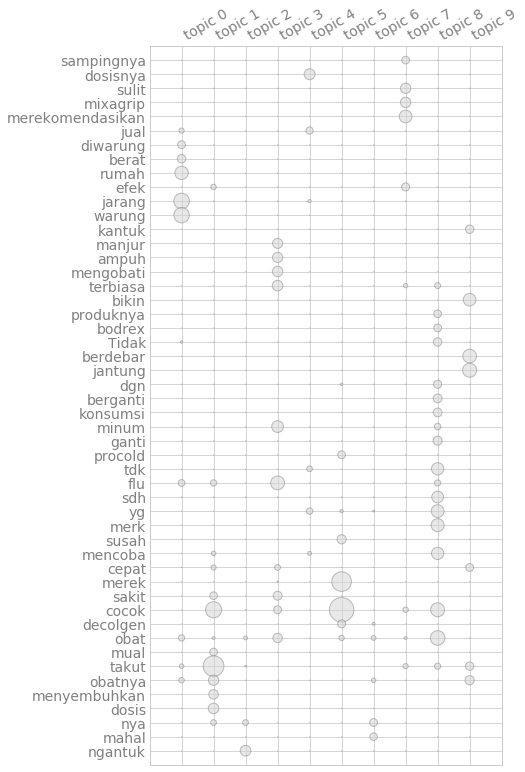

In [76]:
from textacy.vsm import Vectorizer
from nltk.corpus import stopwords
from textacy.tm import TopicModel

# raw_text_raw.split(".")

terms_list=[[tok  for tok in doc.split() if tok not in nlp.Defaults.stop_words ] for doc in data['reviewText']]
vectorizer = Vectorizer(tf_type='sqrt', apply_idf=True, idf_type='smooth',apply_dl = True, dl_type= 'sqrt',norm ='l2')
doc_term_matrix = vectorizer.fit_transform(terms_list)
model = TopicModel('lda', n_topics=10)
model.fit(doc_term_matrix)
doc_topic_matrix = model.transform(doc_term_matrix)

for topic_idx, top_terms in model.top_topic_terms(vectorizer.id_to_term):
  print('topic', topic_idx, ':', '   '.join(top_terms))
model.y7(doc_term_matrix, vectorizer.id_to_term, topics=-1,  n_terms=50, sort_terms_by='seriation') 

In [69]:
from rake_nltk import Metric, Rake
r = Rake(ranking_metric=Metric.WORD_DEGREE, min_length=2,max_length=2, punctuations=["'",'.','?',';','!','..','?!','!?',',','*,','**,','***,','****,','*****,']) # Uses stopwords for english from NLTK, and all puntuation characters.
r.extract_keywords_from_text(".".join(data['reviewText']))
r.get_ranked_phrases_with_scores()

[(44.0, 'kurang cocok'),
 (42.0, 'tidak cocok'),
 (34.0, 'tidak ngantuk'),
 (34.0, 'kurang manjur'),
 (32.0, 'tidak manjur'),
 (30.0, 'tidak terbiasa'),
 (30.0, 'kurang ampuh'),
 (28.0, 'tidak ampuh'),
 (28.0, 'tidak ada'),
 (28.0, 'kurang terkenal'),
 (28.0, 'kurang khasiatnya'),
 (28.0, 'khasiatnya kurang'),
 (26.0, 'tidak terkenal'),
 (26.0, 'takut cocok'),
 (26.0, 'sudah cocok'),
 (26.0, 'kurang mujarab'),
 (26.0, 'kurang efelkt'),
 (26.0, 'kurang efektif'),
 (26.0, 'kurang dikenal'),
 (26.0, 'kurang cock'),
 (26.0, 'kurang berkhasiat'),
 (26.0, 'karena tidak'),
 (24.0, 'tidak tertarik'),
 (24.0, 'tidak familiar'),
 (24.0, 'tidak berminat'),
 (24.0, 'tdk cocok'),
 (24.0, 'menyebabkan kantuk'),
 (24.0, 'membuat kantuk'),
 (24.0, 'bikin kantuk'),
 (22.0, 'tifdak cocok'),
 (22.0, 'tifak cocok'),
 (22.0, 'tidsk cocok'),
 (22.0, 'tfk cocok'),
 (22.0, 'nggak cocok'),
 (22.0, 'menyebabkan ngantuk'),
 (22.0, 'membuat ngantuk'),
 (22.0, 'bikin ngantuk'),
 (20.0, 'susah didapat'),
 (20.0, 's

In [73]:
from textblob import TextBlob
blob = TextBlob("Saya suka perpustakaan ini")
blob.sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [0]:
doc = 

In [47]:
text = doc1
negation_tokens = [tok for tok in text if tok.dep_ == 'neg']
negation_head_tokens = [token.head for token in negation_tokens]
NeagtionToken = []
for token in negation_head_tokens:
    NeagtionToken.append((token.text, token.dep_, token.head.text, token.head.pos_, [child for child in token.children]))
print (NeagtionToken)

[]


In [0]:
def NounPhrase(eachValue):
    eachValue = nlp(eachValue)
    noun_phrase_pairs = []
    for chunk in eachValue.noun_chunks:
    #   print (chunk.text)
      if len(chunk.text.split(" "))>1 and chunk.text not in nltk.corpus.stopwords.words('english'):
        noun_phrase_pairs.append(chunk.text)
    return noun_phrase_pairs

def getLemma(eachValue):
  try:
    doc = nlp(eachValue)
    LemmatizedSentence = []
    for token in doc:
      if token.pos_ not in ["PUNCT", "NUM", "SYM" ]:
        if token.lemma_ == "-PRON-":
          LemmatizedSentence.append(token.text)
        else:
          LemmatizedSentence.append(token.lemma_)
    return " ".join(LemmatizedSentence)
  except TypeError:
    return " "
  
  
def getSubjectVErbObject(eachValue):
    text = nlp(eachValue)
    # return [list(textacy.extract.subject_verb_object_triples(text))]
    return [', '.join(item.text for item in triple) for triple in textacy.extract.subject_verb_object_triples(text)]

def getPageRankTopics(eachValue):
    text = nlp(eachValue)
    return list(textacy.keyterms.key_terms_from_semantic_network(text, normalize='lemma', window_width=2, edge_weighting='binary', ranking_algo='pagerank', join_key_words=False, n_keyterms=5))
    # return [', '.join(item.text for item in triple) for triple in Topic]

def getSGRankTopics(eachValue):
    text = nlp(eachValue)
    return list(textacy.keyterms.sgrank(text, ngrams=(1, 2, 3, 4, 5, 6), normalize='lemma', window_width=1500, n_keyterms=10, idf=None))
    # return [', '.join(item.text for item in triple) for triple in Topic]

def getTextRank(eachValue):
    text = nlp(eachValue)
    return list(textacy.keyterms.textrank(text, normalize='lemma', n_keyterms=10))
    # return [', '.join(item.text for item in triple) for triple in Topic]

def getNegationTokens(eachValue):
    text = nlp(eachValue)
    negation_tokens = [tok for tok in text if tok.dep_ == 'neg']
    negation_head_tokens = [token.head for token in negation_tokens]
    NeagtionToken = []
    for token in negation_head_tokens:
        NeagtionToken.append((token.text, token.dep_, token.head.text, token.head.pos_, [child for child in token.children]))
    return NeagtionToken


In [0]:
nlp = spacy.load("models/model-best")
data = df
data['LemmClean'] = data.reviewText.apply(getLemma)
data['NounPhrase'] = data.reviewText.apply(NounPhrase)
data['SubjectVerbObject'] = data.reviewText.apply(getSubjectVErbObject)
data['KeyRankTopics'] = data.reviewText.apply(getPageRankTopics)
data['SGRankTopics'] = data.reviewText.apply(getSGRankTopics)
data['TextRankTopics'] = data.reviewText.apply(getSGRankTopics)
data['NegationToken'] = data.reviewText.apply(getNegationTokens)

In [0]:
data.head()

,unique_id,reviewText,DetectedLanguage,LemmClean,NounPhrase,SubjectVerbObject,KeyRankTopics,SGRankTopics,TextRankTopics,NegationToken
0,1,sulit di telan tablet nya gede,id,sulit di telan tablet nya gede,[],[],[],[],[],[]
1,2,karena sdh terbiasa mengkonsumsi mixagrif,id,karena sdh biasa mengkonsumsi mixagrif,[],"[sdh, mengkonsumsi, mixagrif]",[],[],[],[]
2,3,karena sdh menggunakan mixagrif flu dan batuk ...,id,karena sdh guna mixagrif flu dan batuk dan tdk...,[flu dan batuk],[],[],[],[],[]
3,4,belum pernah mencoba produk Nya,id,belum pernah coba produk Nya,[produk Nya],[],[],[],[],[]
4,5,tidak cocok untuk mengobati sakit flu,id,tidak cocok untuk obat sakit flu,[],[],"[(sakit, 0.48648582432442095), (cocok, 0.25675...","[(sakit flu, 0.649122638064138), (cocok, 0.350...","[(sakit flu, 0.649122638064138), (cocok, 0.350...",[]


In [0]:
data.to_csv("BahasaOutput.csv")